### Bank Statistics: Analysis of EPS and PE Ratio

In [1]:
# import packages 
import matplotlib.pyplot as plt
import math
import numpy as np
import os
import pandas as pd
import requests
import seaborn as sns
import sys

from scipy import stats 

In [2]:
bank_stats = pd.read_csv('../data/01_raw/all_stocks_stats.csv', index_col='ticker')

In [3]:
bank_stats.columns

Index(['avg10Volume', 'avg30Volume', 'beta', 'companyName', 'day200MovingAvg',
       'day30ChangePercent', 'day50MovingAvg', 'day5ChangePercent',
       'dividendYield', 'employees', 'exDividendDate', 'float', 'marketcap',
       'maxChangePercent', 'month1ChangePercent', 'month3ChangePercent',
       'month6ChangePercent', 'nextDividendDate', 'nextEarningsDate',
       'peRatio', 'sharesOutstanding', 'ttmDividendRate', 'ttmEPS',
       'week52change', 'week52high', 'week52low', 'year1ChangePercent',
       'year2ChangePercent', 'year5ChangePercent', 'ytdChangePercent'],
      dtype='object')

##### Look at EPS Distribution

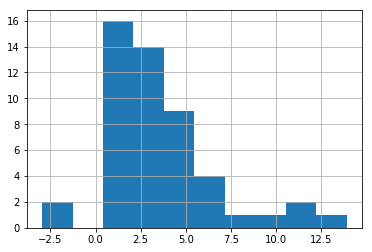

In [4]:
bank_stats.ttmEPS.hist()
plt.show()

In [5]:
bank_stats.dropna(subset=['ttmEPS'], inplace=True)

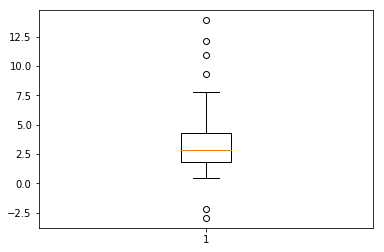

In [6]:
plt.figure()
plt.boxplot(bank_stats.ttmEPS)
plt.show()

In [ ]:
# outlier data points 
bank_stats.loc[(bank_stats['ttmEPS'] < 0) | (bank_stats['ttmEPS'] > 8)]

In [ ]:
# mean ttemp value across 51 banks
bank_stats.ttmEPS.mean() # should we be including the banks we are testing in the population number? 

### 1. Question: Are the Earnings per share (EPS) significantly larger for the 6 outlier banks than the entire population

$\textbf{Hypothesis:}$

$$H_{0}: \mu = \bar{X}$$
$$H_{a}: \mu \neq \bar{X}$$

<font color='red'>Note: This may not be a meaningful test. Can you test one data point against an entire population?</font> 

1) Set up null and alternative hypotheses

2) Choose a significance level

3) Calculate the test statistic

4) Determine the critical or p-value (find the rejection region)

5) Compare t-value with critical t-value to accept or reject the Null hypothesis.

### 2. Question: Are Earnings per share (EPS) significantly different for high vs low beta banks?  

In [ ]:
# split the banks up into high and low beta value institutions
banks_highb = bank_stats.loc[bank_stats['beta'] >= 1]
banks_lowb = bank_stats.loc[bank_stats['beta'] < 1]

* **The population mean ($\mu$).** Given as 100 (from past data).
* **The sample mean ($\bar{x}$).** Calculate from the sample data
* **The sample standard deviation ($s$).** Calculate from sample data
* **Number of observations($n$).** 25 as given in the question. This can also be calculated from the sample data.
* **Degrees of Freedom($df$).** Calculate from the sample as df = total no. of observations - 1

In [ ]:
# High Beta Samples vs population
# population mean 
mu = bank_stats.ttmEPS.mean()

# Sample mean (x̄) using NumPy mean()
x_bar = banks_highb.ttmEPS.mean()

# Sample Stadrad Deviation (sigma) using Numpy
sigma = np.std(banks_highb.ttmEPS, ddof=9) # how many degrees of freedom should I use? 

# Sample size (n)
n = len(banks_highb.ttmEPS)

# Degrees of Freedom
df = n-1

# Difference in sample mean 
diff = x_bar - mu

# Print the findings
print ('The sample contains', n, 'observations, having a mean of', x_bar, "and a standard deviation (sigma) = ", sigma, 
       ", with", df, 'degrees of freedom. The difference between sample and population means is:', diff)


In [ ]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(banks_highb.ttmEPS)

$H_{0}$: The null hypothesis is that there is no difference between the earnings per share:

> $$H_{0}: \mu = \bar{X}_{high \beta}$$

$H_{1}$: The alternative hypothesis is that there is a change i.e. The high beta banks are differnt from the population.

> $$H_{a}: \mu \neq \bar{X}_{high \beta}$$

In [ ]:
# Calculate the t-statistic
t = (x_bar -  mu)/(sigma/np.sqrt(n))
t

In [ ]:
# Low Beta Samples vs Population 
# population mean 
mu = bank_stats.ttmEPS.mean()

# Sample mean (x̄) using NumPy mean()
x_bar = banks_lowb.ttmEPS.mean()

# Sample Stadrad Deviation (sigma) using Numpy
sigma = np.std(banks_lowb.ttmEPS, ddof=39) # how many degrees of freedom should I use? 

# Sample size (n)
n = len(banks_lowb.ttmEPS)

# Degrees of Freedom
df = n-1

# Difference in sample mean 
diff = x_bar - mu

# Print the findings
print ('The sample contains', n, 'observations, having a mean of', x_bar, "and a standard deviation (sigma) = ", sigma, 
       ", with", df, 'degrees of freedom. The difference between sample and population means is:', diff)

In [ ]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(banks_lowb.ttmEPS)

1) Set up null and alternative hypotheses

$$H_{0}: \mu = \bar{X}_{high \beta}$$
$$H_{a}: \mu \neq \bar{X}_{high \beta}$$

$$and$$

$$H_{0}: \mu = \bar{X}_{low \beta}$$
$$H_{a}: \mu \neq \bar{X}_{low \beta}$$

2) Choose a significance level

3) Calculate the test statistic

4) Determine the critical or p-value (find the rejection region)

5) Compare t-value with critical t-value to accept or reject the Null hypothesis.